In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("mlb-umpire-scorecard.csv")
data

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124,4,10,120,114,6,96.8,92,4.8,97.6,0.09,0.75
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149,6,7.4,143,141.6,1.4,96,95,0.9,97.3,-0.12,0.58
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124,7,7.1,117,116.9,0.1,94.4,94.3,0.1,92.7,-0.1,0.56
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140,5,6,135,134,1,96.4,95.7,0.7,92.9,0.63,0.73
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129,0,8.7,129,120.3,8.7,100,93.2,6.8,96.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18208,18209,2015-04-06,Jeff Nelson,MIA,ATL,1,2,130,12,12.7,118,117.3,0.7,90.8,90.3,0.5,93.8,-0.28,1.42
18209,18210,2015-04-06,Ted Barrett,HOU,CLE,2,0,124,21,14.2,103,109.8,-6.8,83.1,88.5,-5.5,91.9,0.51,1.97
18210,18211,2015-04-06,Bill Miller,OAK,TEX,8,0,180,21,20.9,159,159.1,-0.1,88.3,88.4,-0.1,87.2,-0.4,2.44
18211,18212,2015-04-06,Gary Cederstrom,ARI,SF,4,5,148,9,12.2,139,135.8,3.2,93.9,91.7,2.2,94.6,-0.36,0.84


In [3]:
data[data['favor_home']=='ND']

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
312,313,2022-09-16,Malachi Moore,TB,TEX,3,4,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
314,315,2022-09-16,David Rackley,DET,CWS,3,2,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
802,803,2022-08-11,John Tumpane,CIN,CHC,2,4,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
1528,1529,2022-06-15,Jeremy Riggs,DET,CWS,0,13,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
1600,1601,2022-06-10,Pat Hoberg,NYY,CHC,2,1,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17307,17308,2015-06-12,Hunter Wendelstedt,TEX,MIN,6,2,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
17473,17474,2015-05-30,Lance Barksdale,MIN,TOR,3,2,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
17680,17681,2015-05-15,Greg Gibson,CHC,PIT,11,10,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
18045,18046,2015-04-18,Bruce Dreckman,TOR,ATL,6,5,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND


In [4]:
nd = data[data['favor_home']=='ND'].index
nd

Int64Index([  312,   314,   802,  1528,  1600,  2569,  3081,  3217,  3466,
             4069,
            ...
            14644, 14921, 15098, 15761, 16301, 17307, 17473, 17680, 18045,
            18124],
           dtype='int64', length=120)

In [5]:
data = data.drop(nd, axis=0)

In [6]:
data

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124,4,10,120,114,6,96.8,92,4.8,97.6,0.09,0.75
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149,6,7.4,143,141.6,1.4,96,95,0.9,97.3,-0.12,0.58
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124,7,7.1,117,116.9,0.1,94.4,94.3,0.1,92.7,-0.1,0.56
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140,5,6,135,134,1,96.4,95.7,0.7,92.9,0.63,0.73
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129,0,8.7,129,120.3,8.7,100,93.2,6.8,96.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18208,18209,2015-04-06,Jeff Nelson,MIA,ATL,1,2,130,12,12.7,118,117.3,0.7,90.8,90.3,0.5,93.8,-0.28,1.42
18209,18210,2015-04-06,Ted Barrett,HOU,CLE,2,0,124,21,14.2,103,109.8,-6.8,83.1,88.5,-5.5,91.9,0.51,1.97
18210,18211,2015-04-06,Bill Miller,OAK,TEX,8,0,180,21,20.9,159,159.1,-0.1,88.3,88.4,-0.1,87.2,-0.4,2.44
18211,18212,2015-04-06,Gary Cederstrom,ARI,SF,4,5,148,9,12.2,139,135.8,3.2,93.9,91.7,2.2,94.6,-0.36,0.84


In [7]:
data.dtypes

id                               int64
date                            object
umpire                          object
home                            object
away                            object
home_team_runs                   int64
away_team_runs                   int64
pitches_called                  object
incorrect_calls                 object
expected_incorrect_calls        object
correct_calls                   object
expected_correct_calls          object
correct_calls_above_expected    object
accuracy                        object
expected_accuracy               object
accuracy_above_expected         object
consistency                     object
favor_home                      object
total_run_impact                object
dtype: object

In [8]:
data = data.astype({'favor_home':'float'})
data.dtypes

id                                int64
date                             object
umpire                           object
home                             object
away                             object
home_team_runs                    int64
away_team_runs                    int64
pitches_called                   object
incorrect_calls                  object
expected_incorrect_calls         object
correct_calls                    object
expected_correct_calls           object
correct_calls_above_expected     object
accuracy                         object
expected_accuracy                object
accuracy_above_expected          object
consistency                      object
favor_home                      float64
total_run_impact                 object
dtype: object

Text(0, 0.5, 'favor_home')

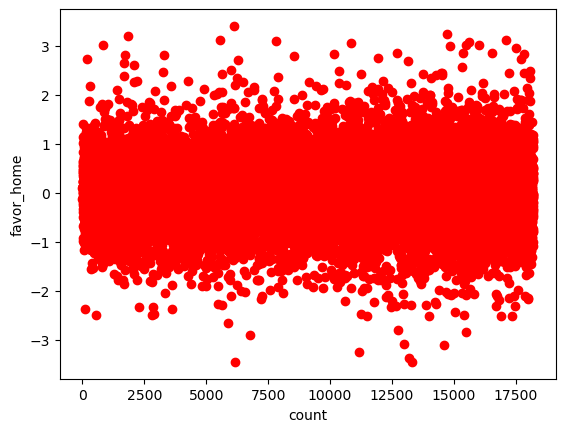

In [9]:
plt.plot(data['favor_home'], 'ro')
plt.xlabel('count')
plt.ylabel('favor_home')

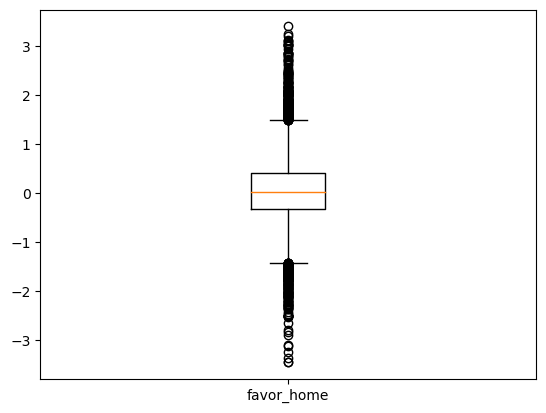

[-0.33  0.03  0.4 ]
                 id  home_team_runs  away_team_runs    favor_home
count  18093.000000    18093.000000    18093.000000  18093.000000
mean    9097.235063        4.560880        4.432046      0.034539
std     5265.213979        3.153966        3.204674      0.637280
min        1.000000        0.000000        0.000000     -3.450000
25%     4534.000000        2.000000        2.000000     -0.330000
50%     9085.000000        4.000000        4.000000      0.030000
75%    13677.000000        6.000000        6.000000      0.400000
max    18213.000000       29.000000       28.000000      3.400000


In [10]:
fig, ax = plt.subplots()
box = ax.boxplot(data['favor_home'])
plt.xticks([1], ['favor_home'])
plt.show()
print(np.quantile(data['favor_home'], (0.25, 0.50, 0.75)))
print(data.describe())

In [11]:
IQR = 0.40 - (-0.33)
outlier1 = -0.33 - 1.5*IQR
outlier2 = 0.40 + 1.5*IQR
print(outlier1, outlier2)

-1.425 1.495


In [12]:
print(data[data['favor_home'] > 1.495])

          id        date          umpire home away  home_team_runs  \
164      165  2022-09-27    Ryan Blakney  NYM  MIA               4   
273      274  2022-09-19  Mike Estabrook  COL   SF               7   
317      318  2022-09-16   Edwin Moscoso  MIL  NYY               7   
697      698  2022-08-18  Ramon De Jesus  CWS  HOU               5   
803      804  2022-08-10  Bruce Dreckman  NYM  CIN              10   
...      ...         ...             ...  ...  ...             ...   
18052  18053  2015-04-18     Paul Nauert  HOU  LAA               4   
18055  18056  2015-04-18    Bob Davidson   TB  NYY               0   
18056  18057  2015-04-18   Lance Barrett   SF  ARI               4   
18085  18086  2015-04-15     Sean Barber  BAL  NYY               7   
18088  18089  2015-04-15   Andy Fletcher  CHC  CIN               5   

       away_team_runs pitches_called incorrect_calls expected_incorrect_calls  \
164                 6            177              15                     16.6 

In [13]:
print(data[data['favor_home'] < -1.425])

          id        date        umpire home away  home_team_runs  \
115      116  2022-10-01     Adam Beck   SD  CWS               5   
362      363  2022-09-12    John Libka  MIA  TEX               2   
365      366  2022-09-12   Cory Blaser  DET  HOU               0   
443      444  2022-09-06   Jeff Nelson  BAL  TOR               9   
564      565  2022-08-28      Laz Diaz   KC   SD              15   
...      ...         ...           ...  ...  ...             ...   
17975  17976  2015-04-24   Mark Wegner   SD  LAD               0   
17979  17980  2015-04-23  Chris Conroy  PHI  MIA               1   
18014  18015  2015-04-21   Ted Barrett  MIL  CIN              10   
18040  18041  2015-04-19  Dan Iassogna   SF  ARI               1   
18132  18133  2015-04-12   Mike DiMuro  OAK  SEA               7   

       away_team_runs pitches_called incorrect_calls expected_incorrect_calls  \
115                 2            144              10                     10.2   
362                 3

(array([   9.,   42.,  249., 1551., 6516., 7151., 2122.,  368.,   61.,
          24.]),
 array([-3.45 , -2.765, -2.08 , -1.395, -0.71 , -0.025,  0.66 ,  1.345,
         2.03 ,  2.715,  3.4  ]),
 <BarContainer object of 10 artists>)

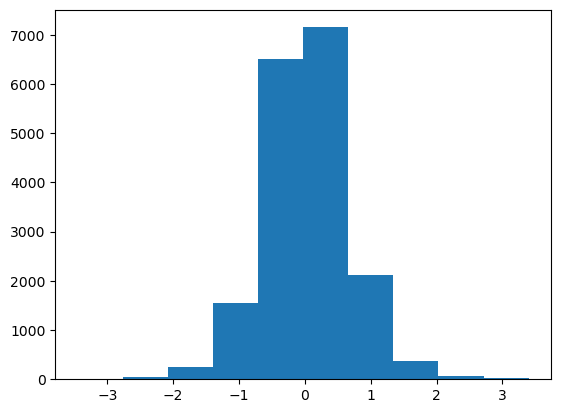

In [14]:
#t-test 수행하기 전 조건 만족하는지 확인
#독립성은 만족
#Normality 체크
#1. 정규성 검사(시각화) : Histogram
plt.hist(data['favor_home'])

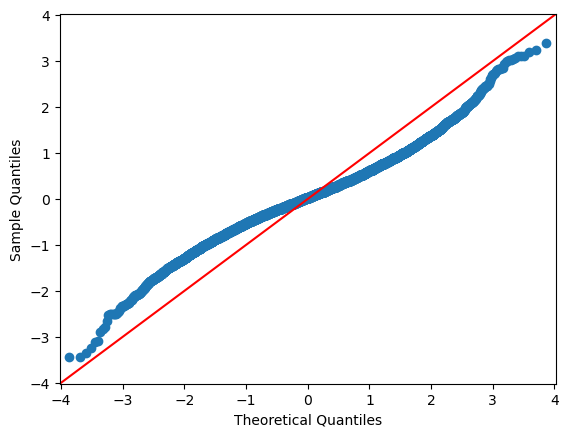

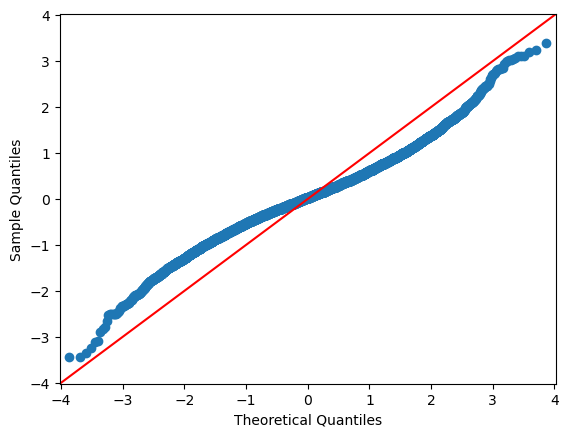

In [15]:
#2. 정규성 검사(시각화) : Q-Q plot
import statsmodels.api as sm
sm.qqplot(data['favor_home'], line='45')

In [16]:
#3. 정규성 검사 : Shapiro-Wilk Test
stats.shapiro(data['favor_home'])

C:\anaconda\envs\asp\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.985867977142334, pvalue=1.6546912018631272e-38)

In [17]:
#4. 정규성 검사 : Kolmogorov_Smirnov Test
import statistics
stats.kstest(data['favor_home'],
             stats.norm.rvs(loc = statistics.mean(data['favor_home']),
             scale = statistics.variance(data['favor_home']),
             size=20))

# 통계적 기법으로 정규성 검사는 p-value가 매우 작게 나타나서 정규성을 안따르는것처럼 보임.
# 그러나 시각화한것 처럼 주어진 데이터는 정규성을 따르며, 데이터의 수 N이 약 18000개로, N>30이므로 정규성 검사할 필요없이
# 중심극한정리에 의해 정규성을 따름.

KstestResult(statistic=0.18576244956613053, pvalue=0.44191135974220497)

In [18]:
#독립성, 정규성 만족하므로 t-test 수행
stats.ttest_1samp(data['favor_home'], popmean=0, alternative = 'two-sided')

Ttest_1sampResult(statistic=7.290194628947248, pvalue=3.22270725996171e-13)

In [19]:
data.groupby('home').agg({'favor_home' : 'sum'})

,favor_home
home,
ARI,34.83
ATL,35.02
BAL,3.64
BOS,31.15
CHC,38.54
CIN,-41.53
CLE,27.50
COL,36.23
CWS,12.97
